In [1]:
from collections import Counter

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import numpy as np
import seaborn as sb

## General statistics

In [2]:
meta_df = pd.read_excel('../data/metadata_corrected.xlsx')
meta_df = meta_df[meta_df['exclude'] != 'x']
meta_df = meta_df[meta_df['genre'] == 'Epiek']
meta_df = meta_df.groupby('title').sample(1)
len(meta_df)

161

In [3]:
meta_df['author'].value_counts(dropna=False)

author
NaN                      124
Jacob van Maerlant         9
Jan van Boendale           6
Lodewijk van Velthem       3
Augustijnken               3
Hendrik van Veldeke        1
Penninc                    1
Willem                     1
Hein van Aken              1
Philip Utenbroeke          1
Lambertus Goetman          1
Jan Praet                  1
Jan van Heelu              1
Loy Latewaert              1
Melis Stoke                1
Jan de Weert               1
Heraut Beyeren             1
Diederic van Assenede      1
Calfstaf en Noydekin       1
Dirc Potter                1
Pieter Vostaert            1
Name: count, dtype: int64

In [4]:
meta_df['subgenre'].value_counts()

subgenre
Didactiek         47
Karel             28
Ridder            22
Arthur            17
Historiografie    17
Heiligenleven     11
Kruisvaart         9
Religie            7
Dier               3
Name: count, dtype: int64

## Statistics combinations

In [5]:
df = pd.read_excel('../figures/statistics.xlsx')
len(df)

12880

In [6]:
df['subgenre'] = (df['subgenre1'] == df['subgenre2']).astype('category')
df['author'] = (df['author1'] == df['author2']).astype('category')
print(df['author'].value_counts())
print(df['subgenre'].value_counts())

author
False    12823
True        57
Name: count, dtype: int64
subgenre
False    10803
True      2077
Name: count, dtype: int64


In [7]:
len(df[(df['author1'].isna()) | (df['author2'].isna())])

12214

## Hit ratio

In [17]:
df['hit_ratio'] *= 100
df.sort_values('hit_ratio', ascending=False).head(10)

,t1,t2,l1,l2,hits,genre1,genre2,subgenre1,subgenre2,author1,author2,hit_ratio,subgenre,author
0,Noch meer van wiven,Van der wive wonderlijcheit (lange versie),111,225,149,Epiek,Epiek,Didactiek,Didactiek,NaN,NaN,59.659660,True,False
1,Gwidekijn van Sassen,Ongeïdentificeerd (4),199,139,35,Epiek,Epiek,Karel,Karel,NaN,NaN,12.653194,True,False
2,Ongeïdentificeerd (4),Roman van Cassant,139,29,5,Epiek,Epiek,Karel,Kruisvaart,NaN,NaN,12.403870,False,False
3,Gwidekijn van Sassen,Roman van Cassant,199,29,5,Epiek,Epiek,Karel,Kruisvaart,NaN,NaN,8.664010,False,False
4,Ongeïdentificeerd (4),Roman van Antiochië,139,168,16,Epiek,Epiek,Karel,Kruisvaart,NaN,NaN,6.851662,False,False
5,Roman van Cassant,Vande Hertogen ende Heeren van Brabant,29,302,6,Epiek,Epiek,Kruisvaart,Historiografie,NaN,NaN,6.850879,False,False
6,Ogier van Denemarken,Ongeïdentificeerd (4),530,139,49,Epiek,Epiek,Karel,Karel,NaN,NaN,6.651283,True,False
7,Van den neghen besten (kort),Vande Hertogen ende Heeren van Brabant,71,302,14,Epiek,Epiek,Didactiek,Historiografie,NaN,NaN,6.529242,False,False
8,Brabantsche yeesten (B7),Roman van Cassant,18188,29,330,Epiek,Epiek,Historiografie,Kruisvaart,NaN,NaN,6.256493,False,False
9,Korte kroniek van Brabant (korte versie 1),Korte kroniek van Brabant (lange versie),373,1989,432,Epiek,Epiek,Historiografie,Historiografie,Jan van Boendale,Heraut Beyeren,5.822911,True,False


In [18]:
intergenre = df.groupby(['subgenre1', 'subgenre2'])['hit_ratio'].median().reset_index().rename_axis(None, axis=1)
intergenre.sort_values('hit_ratio', ascending=False)

,subgenre1,subgenre2,hit_ratio
40,Historiografie,Historiografie,0.356470
41,Historiografie,Karel,0.300033
50,Karel,Karel,0.257842
59,Kruisvaart,Karel,0.210830
58,Kruisvaart,Historiografie,0.199393
...,...,...,...
21,Dier,Heiligenleven,0.022424
55,Kruisvaart,Didactiek,0.021953
15,Didactiek,Kruisvaart,0.010081
33,Heiligenleven,Kruisvaart,0.000000


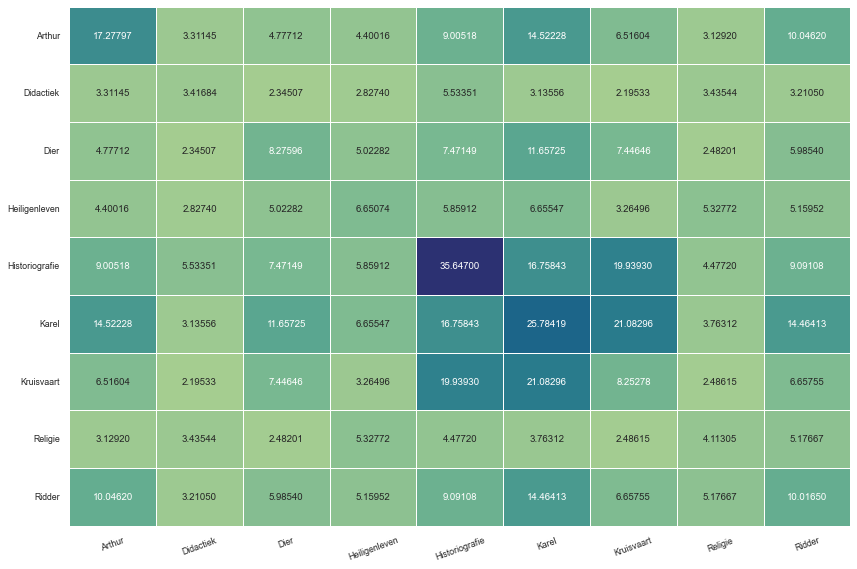

In [19]:
genres = sorted(set(list(intergenre['subgenre1']) + list(intergenre['subgenre2'])))
hits = np.zeros((len(genres), len(genres)))

for _, row in intergenre.iterrows():
    hits[genres.index(row['subgenre1']), genres.index(row['subgenre2'])] = row['hit_ratio'] * 100
    hits[genres.index(row['subgenre2']), genres.index(row['subgenre1'])] = row['hit_ratio'] * 100

hits = pd.DataFrame(hits, index=genres, columns=genres)
fig, ax = plt.subplots(figsize=(12, 8))
sb.set(font_scale=.8)
sb.set_style("whitegrid", {'axes.grid' : False})
ax = sb.heatmap(hits, annot=True, cmap='crest', cbar=False,
                linewidths=1, linecolor='white', fmt='.5f')
ax.tick_params(left=False, bottom=False)
for l in plt.gca().lines:
    l.set_alpha(0.3)
plt.xticks(rotation=20)
plt.tight_layout()
plt.savefig(f'../figures/genre_dist.png', dpi=500);

In [20]:
df[(df['l1'] > 2000) & (df['l2'] > 2000) &
   (df['subgenre1'] != 'Historiografie') &
   (df['subgenre2'] != 'Historiografie') &
   (df['subgenre1'] != df['subgenre2']) &
   (df['author1'].isna()) & (df['author2'].isna())
  ].sort_values('hit_ratio', ascending=False).head(10)

,t1,t2,l1,l2,hits,genre1,genre2,subgenre1,subgenre2,author1,author2,hit_ratio,subgenre,author
1416,Limborch,Roman der Lorreinen II,21847,9895,6918,Epiek,Epiek,Ridder,Karel,NaN,NaN,0.320017,False,False
1607,Ferguut,Renout van Montalbaen,5602,2552,407,Epiek,Epiek,Arthur,Karel,NaN,NaN,0.284689,False,False
1714,Limborch,Renout van Montalbaen,21847,2552,1480,Epiek,Epiek,Ridder,Karel,NaN,NaN,0.265454,False,False
1794,Renout van Montalbaen,Walewein ende Keye,2552,2809,182,Epiek,Epiek,Karel,Arthur,NaN,NaN,0.253886,False,False
1856,Der mannen ende vrouwen heimelijcheit,Roman der Lorreinen II,2328,9895,569,Epiek,Epiek,Didactiek,Karel,NaN,NaN,0.247009,False,False
1876,Ferguut,Roman der Lorreinen II,5602,9895,1355,Epiek,Epiek,Arthur,Karel,NaN,NaN,0.244445,False,False
1960,Der mannen ende vrouwen heimelijcheit,Ferguut,2328,5602,307,Epiek,Epiek,Didactiek,Arthur,NaN,NaN,0.235403,False,False
1980,Moriaen,Renout van Montalbaen,4482,2552,266,Epiek,Epiek,Arthur,Karel,NaN,NaN,0.232557,False,False
1989,Perchevael,Renout van Montalbaen,3654,2552,216,Epiek,Epiek,Arthur,Karel,NaN,NaN,0.231635,False,False
2035,Renout van Montalbaen,Wrake van Ragisel,2552,2066,120,Epiek,Epiek,Karel,Arthur,NaN,NaN,0.227599,False,False


For comparison:

In [21]:
trg = ['Moriaen', 'Lantsloot van der Haghedochte', 'Karel ende Elegast']
trg_df = df[(df['t1'].isin(trg)) & (df['t2'].isin(trg))]
th = trg_df['hits'].mean()
trg_df.sort_values('hits')

,t1,t2,l1,l2,hits,genre1,genre2,subgenre1,subgenre2,author1,author2,hit_ratio,subgenre,author
1339,Karel ende Elegast,Moriaen,1363,4482,204,Epiek,Epiek,Karel,Arthur,NaN,NaN,0.333935,False,False
1662,Karel ende Elegast,Lantsloot van der Haghedochte,1363,5837,219,Epiek,Epiek,Karel,Arthur,NaN,NaN,0.275270,False,False
862,Lantsloot van der Haghedochte,Moriaen,5837,4482,1226,Epiek,Epiek,Arthur,Arthur,NaN,NaN,0.468629,True,False
